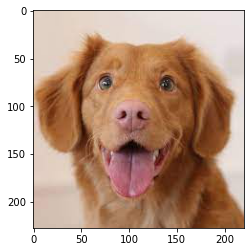

In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(img_path):
    image = mpimg.imread(img_path)
    plt.imshow(image)
    plt.show()


current_dir = os.path.abspath(".")

test_image_path = os.path.join(current_dir, 'images', 'images', 'dog', '0.jpg')
show_image(test_image_path)


# Categorizing Data from directory using Tensorflow

In [26]:
import tensorflow as tf

data_dir = os.path.join(current_dir, 'images', 'images')

img_height = 224
img_width = 224
batch_size = 16
random_seed = 32601

# where I got code from https://www.tensorflow.org/tutorials/load_data/images
dataset = tf.keras.utils.image_dataset_from_directory(  # https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
    data_dir,
    validation_split=0.25,
    subset="training",
    seed=random_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    interpolation='bilinear')


Found 740 files belonging to 2 classes.
Using 555 files for training.


['cat', 'dog']


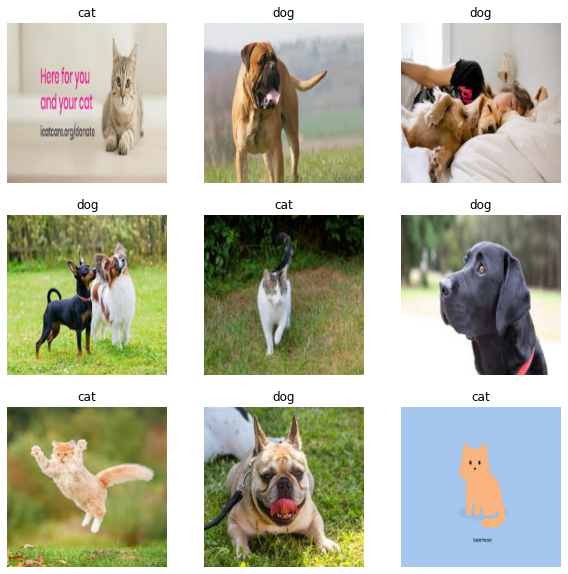

In [27]:
# imported again
import matplotlib.pyplot as plt # https: // matplotlib.org/stable/gallery/index

# what are the class names?
class_names = dataset.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


# They are stretched...

**Does that matter?**

Idk, does it??

**How can I change it?**

What are some ideas?

crop_to_aspect_ratio (change it and show)

In [28]:
train = tf.keras.utils.image_dataset_from_directory(  # https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
    data_dir,
    validation_split=0.25,
    subset="training",
    seed=random_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    interpolation='bilinear')

valid = tf.keras.utils.image_dataset_from_directory(  # https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
    data_dir,
    validation_split=0.25,
    subset="validation",
    seed=random_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    interpolation='bilinear')


Found 740 files belonging to 2 classes.
Using 555 files for training.
Found 740 files belonging to 2 classes.
Using 185 files for validation.


In [29]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator  # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

# datagen = ImageDataGenerator(  # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
#     samplewise_center=True,
#     rotation_range=15,
#     zoom_range=0.1,
#     width_shift_range=0.1,
#     height_shift_range=0.1, 
#     horizontal_flip=True,
#     vertical_flip=False
# )

# datagen.flow_from_directory(  # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
#     data_dir, 
#     target_size=(img_height, img_width), 
#     batch_size=batch_size, 
#     class_mode='categorical')


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=len(class_names), activation="softmax"))


In [33]:
from tensorflow import keras

# model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(0.001), metrics=[tf.keras.metrics.CategoricalAccuracy])
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam', metrics=["accuracy"])


In [34]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 75)      2100      
                                                                 
 batch_normalization_3 (Batc  (None, 224, 224, 75)     300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 75)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 50)      33800     
                                                                 
 dropout_2 (Dropout)         (None, 112, 112, 50)      0         
                                                                 
 batch_normalization_4 (Batc  (None, 112, 112, 50)    

In [35]:
model.fit(train, validation_data=valid, epochs=10, validation_steps=24, steps_per_epoch=12)


Epoch 1/10
12/12 [==============================] - 23s 2s/step - loss: 4.5832 - accuracy: 0.5573 - val_loss: 39.7858 - val_accuracy: 0.4688
Epoch 2/10
12/12 [==============================] - 11s 823ms/step - loss: 4.0160 - accuracy: 0.5906 - val_loss: 11.5582 - val_accuracy: 0.4375
